# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

import nltk
from nltk.corpus import wordnet, stopwords
from nltk import *

from wordcloud import WordCloud, STOPWORDS
import re

import sys
from termcolor import colored



# Reading the training data file

In [2]:
train = pd.read_csv("C:/MRU/6 SEM/NLP/dataset/data/data/combined/train.csv")

valid = pd.read_csv('C:/MRU/6 SEM/NLP/dataset/data/data/combined/validation.csv')
test = pd.read_csv('C:/MRU/6 SEM/NLP/dataset/data/data/combined/test.csv')

In [3]:
train.head()

,comment_text,lang,toxic
0,"So, SD either wants our nation to succumb to ...",en,1
1,"i know you are racist, just admit it",en,1
2,"""\n\nI'll be staying out in solidarity with An...",en,0
3,"But given the power of television these days, ...",en,0
4,Correction needed \nthe article states his fir...,en,0


In [4]:
train.toxic = train.toxic.round().astype(int)
train_new = pd.concat([train[['comment_text', 'toxic']]],).sample(n=100000)
#rate=10
#train = train[::rate]
train.head()

,comment_text,lang,toxic
0,"So, SD either wants our nation to succumb to ...",en,1
1,"i know you are racist, just admit it",en,1
2,"""\n\nI'll be staying out in solidarity with An...",en,0
3,"But given the power of television these days, ...",en,0
4,Correction needed \nthe article states his fir...,en,0


# Descriptive Analysis

In [5]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 318194 to 52795
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  100000 non-null  object
 1   toxic         100000 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 1.9+ MB


In [6]:
train_new.describe()

,toxic
count,100000.000000
mean,0.516860
std,0.499718
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
print(f"Train data shape: {colored(train_new.shape, 'red', attrs=['bold'])}")

Train data shape: (100000, 2)


# Checking for Null Values

In [8]:
train_new.isnull().sum()

comment_text    0
toxic           0
dtype: int64

# Exploratory Data Analysis
### Word Cloud Creation

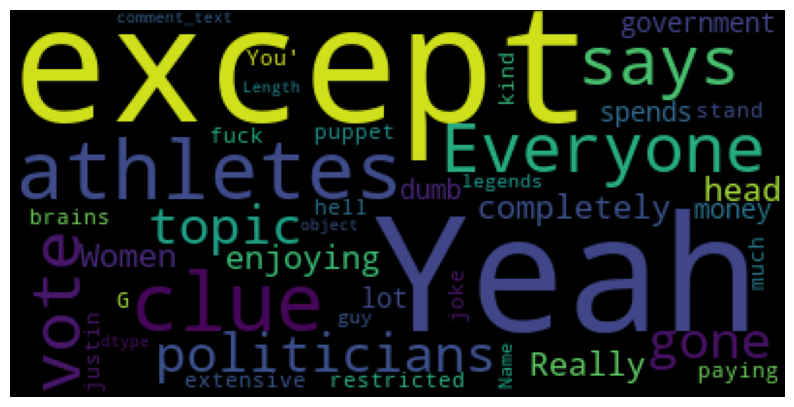

In [9]:
wordcloud = WordCloud(stopwords=stopwords.words('english'),max_words=50).generate(str(train_new.comment_text))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [10]:
nltk.download('punkt') #tokenizer
nltk.download('stopwords') #handle stopwords
nltk.download('wordnet') #Lemmatization

stop_words = stopwords.words('english')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>


In [11]:
stop_nltk = stopwords.words("english")

stop_updated = stop_nltk + ["...","..","\n","\t","==","=","//","'",'D',',','en wikipedia org','https en wikipedia','wikipedia org wiki'] 

In [12]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

Using RE to merger the contractions dictionary with the main dataset

In [13]:
import re

contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [14]:
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [15]:
from string import punctuation
lemm = WordNetLemmatizer()
def clean_text(sent):
    tokens = word_tokenize(sent.lower())
    lemmed = [lemm.lemmatize(term) for term in tokens \
               if term not in stop_updated and \
                term not in list(punctuation) and\
               len(term) > 2] 
    res = " ".join(lemmed)
    return res

In [16]:
train_new['clean_text']=train_new['comment_text'].apply(lambda x:expand_contractions(x))

train_new['clean_text']=train_new['clean_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [17]:
train_new['clean_text'] = train_new.clean_text.apply(clean_text)

In [18]:
train_new.head()

,comment_text,toxic,clean_text
318194,Yeah except these athletes have no clue what t...,1,yeah except athlete clue protesting assembled ...
229744,Everyone says vote out the politicians but I a...,0,everyone say vote politician already see every...
286134,The topic has gone completely over your head. ...,1,topic gone completely head white guy chose com...
282620,??? Really? Women have been enjoying their own...,1,really woman enjoying sex robot almost century...
130074,Our government spends a lot of money on dumb s...,1,government spends lot money dumb stuff vote ga...


In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [20]:
X = train_new.clean_text.values
target = train_new.toxic.values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.75,random_state=42)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [23]:
# import pickle
# with open("tf_idf_88.pickle", "wb") as f:
#     pickle.dump(tfidf_vectorizer, f)

In [24]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)
target_prediction = classifier.predict(X_test_tfidf)
print('Accuaracy score for toxic comment classification:',accuracy_score(y_test,target_prediction)*100)

Accuaracy score for toxic comment classification: 87.844


In [25]:
# import pickle

In [26]:
# nlp_model = pickle.dumps(classifier)

In [27]:
# with open("tf_idf_mnb_88.pickle", "wb") as f:
#     pickle.dump(classifier, f)
    
